# 1 Trucos para entrenar redes neuronales

## 1.1 Tasa de aprendizaje

La clase pasada entrenamos una red neuronal usando el optimizador SGD y el optimizador Adam.

1. Implemente las siguientes funciones para computar la precisión y la pérdida sobre los datos de entrenamiento y
validación (Note que debe completar la definición de la función y comentar donde se indica).

In [9]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def precision(prueba=True):
  loader = test_loader if prueba else train_loader
  total=0
  correct=0
  with torch.no_grad():
    for xi, yi in loader:
      xi = xi.reshape(-1, 28*28).to(device)
      yi = yi.to(device)
      output = model(xi)
      _, predicted = torch.max(output.data, 1)
      total += yi.size(0)
      correct += (predicted == yi).sum().item()
  return correct/total

def perdida(prueba=True):
  trainset_loss = 0.0
  loader = test_loader if prueba else train_loader
  with torch.no_grad():
    for xi, yi in loader:
      xi = xi.reshape(-1, 28*28).to(device)
      yi = yi.to(device)
      output = model(xi)
      loss = loss_function(output, yi)

    batch_loss = loss.item() * yi.size(0)
    trainset_loss += batch_loss
  return trainset_loss

2. Entrene una red neuronal profunda con dos capas escondidas (de 200 y 60 unidades) y activaciones nn.ReLU. Optimice utilizando Adam con una una tasa de aprendizaje lr=0.001. Al entrenar grafique la pérdida y el error de precisión.

Primero definimos el modelo correspondiente

In [2]:
class NNh2_relu(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NNh2_relu, self).__init__()

        hidden_size1, hidden_size2  = 200, 60

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        return out

In [10]:
device = torch.device('cuda'if torch.cuda.is_available() else'cpu')

input_size = 784 # Dimension de datos de entrada (28 x 28)
num_classes = 10 # MNIST tiene 10 clases (numeros del 1 al 10)
num_epochs = 10 # Numero de epocas para entrenar
bs = 100 # Tamano de lote (batch_size)

lr = 0.001 # Tasa de aprendizaje


Primero cargamos los datos

In [12]:
root ='./datos'# Carpeta donde se guardaran los datos
train_data = MNIST(root, train=True, transform=ToTensor(), download=True)
test_data  = MNIST(root, train=False, transform=ToTensor())

train_loader = DataLoader(train_data, batch_size=bs, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=bs, shuffle=False)

9920512it [00:03, 2779903.34it/s]                                                                                      


Extracting ./datos\MNIST\raw\train-images-idx3-ubyte.gz to ./datos\MNIST\raw


32768it [00:00, 127097.77it/s]                                                                                         


Extracting ./datos\MNIST\raw\train-labels-idx1-ubyte.gz to ./datos\MNIST\raw


1654784it [00:01, 1593569.75it/s]                                                                                      


Extracting ./datos\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datos\MNIST\raw


8192it [00:00, 35778.50it/s]                                                                                           


Extracting ./datos\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datos\MNIST\raw
Processing...
Done!


Ahora entrenaremos el modelo y calculamos la pérdida y presición con los datos de prueba.

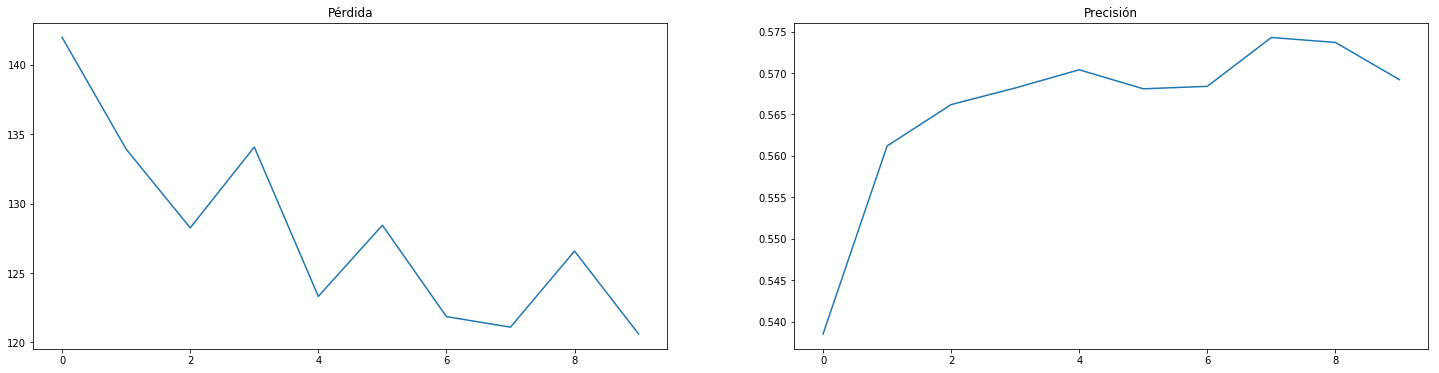

In [72]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())


plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

3. Repita el experimento usando lr=0.01 y lr=0.1. Comente acerca del cambio entre estas tres curvas y el número
de épocas requerido para llegar a algún valor en la pérdida/precisión.

Primero usamos lr = 0.01

In [74]:
lr = 0.01 # Tasa de aprendizaje

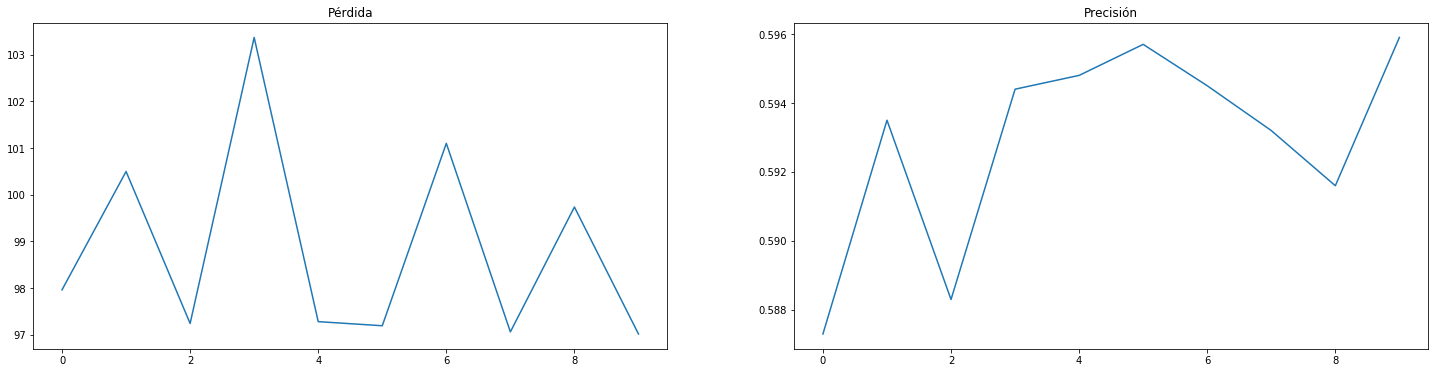

In [75]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())


plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

Ahora usamos lr=0.1

In [76]:
lr = 0.1 # Tasa de aprendizaje

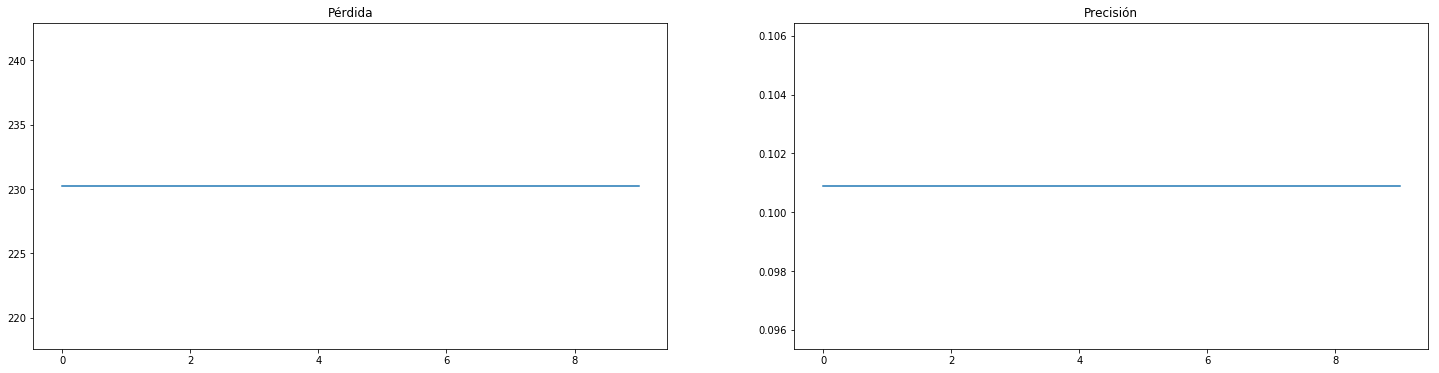

In [77]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())


plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

4. Cuando las curvas de pérdida y error son ruidosas o brincan mucho quiere decir la optimización es demasiado rápida (la tasa de aprendizaje es alta). Un truco para mejorar el aprendizaje es empezar con una tasa de aprendizaje alta lr_init y bajarla gradualmente. Una estrategia para hacer esto es ajustando la magnitud de lr_init exponencialmente en cada época. Por ejemplo, por medio de la siguiente función.

In [78]:
def lr_ajuste(epoca, lr_init, gamma):
    return lr_init * math.pow(gamma, epoca)

Implementamos ExponentialLR en el modelo

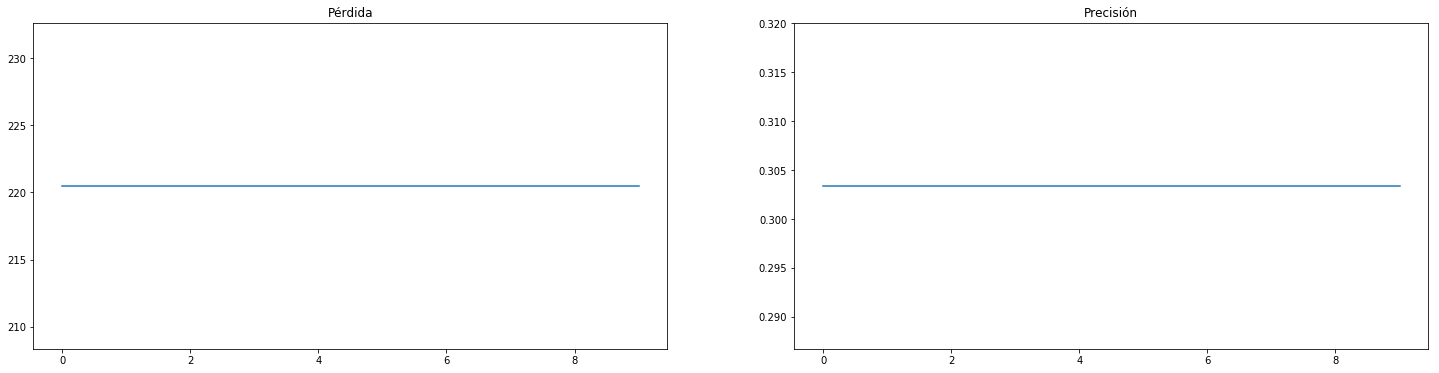

In [82]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.1,-1)

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    scheduler.step()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())
  

plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

## 1.2 Dropout

1. Considere el modelo profundo de redes neuronales con cuatro capas escondidas (de 300, 150, 75, 30 unidades) y
genere gráficas de la pérdida y precisión sobre los datos de entrenamiento y validación.

Promero definimos el modelo

In [3]:
class NNh4(nn.Module):
  def __init__(self, input_size, num_classes):

    super(NNh4, self).__init__()

    hidden_size1 = 300
    hidden_size2 = 150
    hidden_size3 = 75
    hidden_size4 = 30

    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.fc3 = nn.Linear(hidden_size2, hidden_size3)
    self.fc4 = nn.Linear(hidden_size3, hidden_size4)
    self.fc5 = nn.Linear(hidden_size4, num_classes)
    
  def forward(self, x):
    out = self.fc1(x)
    out = self.fc2(out)
    out = self.fc3(out)
    out = self.fc4(out)
    out = self.fc5(out)
    return out

Ahora definimos los hiperparámetros

In [6]:
device = torch.device('cuda'if torch.cuda.is_available() else'cpu')

input_size = 784 # Dimension de datos de entrada (28 x 28)
num_classes = 10 # MNIST tiene 10 clases (numeros del 1 al 10)
num_epochs = 10 # Numero de epocas para entrenar
bs = 100 # Tamano de lote (batch_size)

lr = 0.001 # Tasa de aprendizaje

model = NNh4(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

Ahora entrenamos el modelo

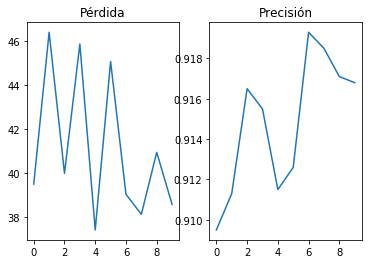

In [7]:
perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  perdida_mod.append(perdida())
  precision_mod.append(precision())

plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

5. Implemente Dropout en su red neuronal.

Volvemos a definir la red usando dropout

In [9]:
class NNh4_dropout(nn.Module):
  def __init__(self, input_size, num_classes):

    super(NNh4_dropout, self).__init__()

    hidden_size1 = 300
    hidden_size2 = 150
    hidden_size3 = 75
    hidden_size4 = 30
    
    self.features = nn.Sequential(
        nn.Dropout(p=0.5),         
        nn.Linear(input_size, hidden_size1),
        nn.Dropout(p=0.5),
        nn.Linear(hidden_size1, hidden_size2),
        nn.Dropout(p=0.5),
        nn.Linear(hidden_size2, hidden_size3),
        nn.Dropout(p=0.5),
        nn.Linear(hidden_size3, hidden_size4),
        nn.Dropout(p=0.5),
        nn.Linear(hidden_size4, num_classes),)
    
  def forward(self, x):
    out = self.features(x)
    return out

Ahora entrenamos el modelo

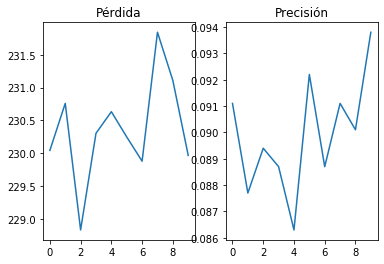

In [10]:
model = NNh4_dropout(input_size, num_classes)

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  perdida_mod.append(perdida())
  precision_mod.append(precision())

plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

# 2. Redes convolucionales
## 2.2 Implementación
1. Implemente la red en Pytorch

In [18]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    
def precision_cnn(prueba=True):
  loader = test_loader if prueba else train_loader
  total=0
  correct=0
  with torch.no_grad():
    for xi, yi in loader:
      #xi = xi.reshape(-1, 28*28).to(device)
      #yi = yi.to(device)
      output = model(xi)
      _, predicted = torch.max(output.data, 1)
      total += yi.size(0)
      correct += (predicted == yi).sum().item()
  return correct/total

def perdida_cnn(prueba=True):
  trainset_loss = 0.0
  loader = test_loader if prueba else train_loader
  with torch.no_grad():
    for xi, yi in loader:
      #xi = xi.reshape(-1, 28*28).to(device)
      #yi = yi.to(device)
      output = model(xi)
      loss = loss_function(output, yi)

    batch_loss = loss.item() * yi.size(0)
    trainset_loss += batch_loss
  return trainset_loss

2. Explique qué hace la función nn.Conv2d()

Aplica la convolución en Pytorch

3. Explique para qué sirven las funciones nn.Sequential y nn.BatchNorm2d.

*Sequential* da claridad al metodo forward, ya que se define desde el constructor el orden de los filtros a aplicar.
*BatchNorm2d* aplica normalización por lotes (*batch normalization*), es decir, normaliza la salida de la capa de activación anterior restando la media y dividiendo entre la desviación estándard.


4. ¿Por qué la capa lineal tiene entrada de 7 X 7 X 32?

Porque a las convoluciones tienen padding y no bajan la resulución (28) de la imagen, solo se divide entre dos con el MaxPool y se aumentan los canales.

6. Use esta red para clasificar los puntos en el conjunto MNIST y reporte el error de clasificación.

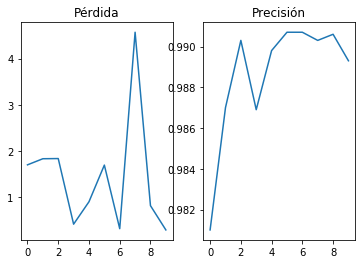

In [20]:
model = CNN(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    #xi = xi.reshape(-1, 28*28).to(device)# imagenes
    #yi = yi.to(device)# etiquetas

    optimizer.zero_grad()
    
    output = model(xi)
    loss = loss_function(output, yi)
    loss.backward()
    optimizer.step()

  perdida_mod.append(perdida_cnn())
  precision_mod.append(precision_cnn())

plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

7. Implemente una red convolucional con las siguientes características:

a) Capa convolucional con activaciones ReLU, tamaño de kernel 3, stride 1, y salida de 12 canales.
b) Capa convolucional con activaciones ReLU, tamaño de kernel 6, stride 2, y salida de 24 canales.
c) Capa convolucional con activaciones ReLU, tamaño de kernel 6, stride 2, y salida de 32 canales.
d) Capa densa con 200 unidades y activaciones ReLu.
e) Capa densa con 10 unidades y activaciones Softmax.